<div align=center>

# Deep Learning Assignment

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Notebook Setup


In [1]:
# DO NOT EDIT THIS CELL.
# DO NOT IMPORT ANY OTHER ENTITIES INTO THE NOTEBOOK.
# DO NOT USE ANY KERAS ENTITIES OTHER THAN THE IMPORTED ONES.

import matplotlib.pyplot as plt
import tensorflow.keras as keras

# For data loading and preprocessing
from keras.datasets import cifar10
from keras.utils import to_categorical

# For model creation
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

# For model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Loading the CIFAR-10 Dataset


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Data Preprocessing


In [3]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### Data Visualization


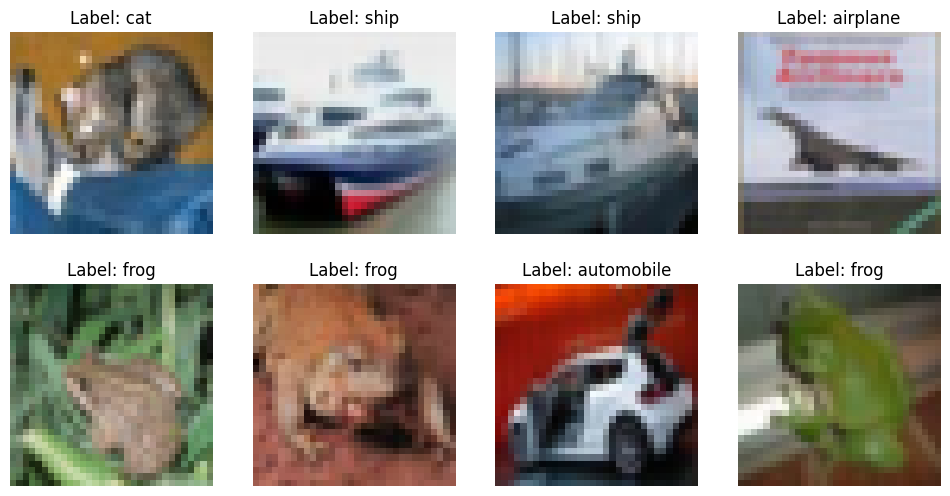

In [4]:
sample_images = X_test[:8, :, :, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :, :])
    plt.title(f"Label: {labels[sample_labels[i, :].argmax()]}")
    plt.axis("off")

plt.show()

### Creating & Training the DNN Model


In [9]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=40,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=48,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation=relu,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=72, activation=relu))
model.add(Dense(units=10, activation=softmax))

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_test, Y_test),
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 40)     │        11,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 48)       │        17,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 72)             │        18,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,730 (299.73 KB)

 Trainable params: 76,730 (299.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - categorical_accuracy: 0.2349 - loss: 2.0684 - val_categorical_accuracy: 0.4076 - val_loss: 1.6223
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - categorical_accuracy: 0.4428 - loss: 1.5372 - val_categorical_accuracy: 0.4884 - val_loss: 1.4190
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - categorical_accuracy: 0.5009 - loss: 1.3837 - val_categorical_accuracy: 0.5319 - val_loss: 1.3003
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - categorical_accuracy: 0.5469 - loss: 1.2750 - val_categorical_accuracy: 0.5507 - val_loss: 1.2378
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - categorical_accuracy: 0.5762 - loss: 1.1937 - val_categorical_accuracy: 0.5671 - val_loss: 1.1993
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - categorical_accuracy: 0.5925 - loss: 1.1474 - val_categorical_accuracy: 0.6024 - val_loss: 1.1286
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - categorical_accuracy: 0.6136 - loss: 

### Model Evaluation

In [10]:
model.get_metrics_result()

{'categorical_accuracy': 0.7171000242233276, 'loss': 0.9440712928771973}

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


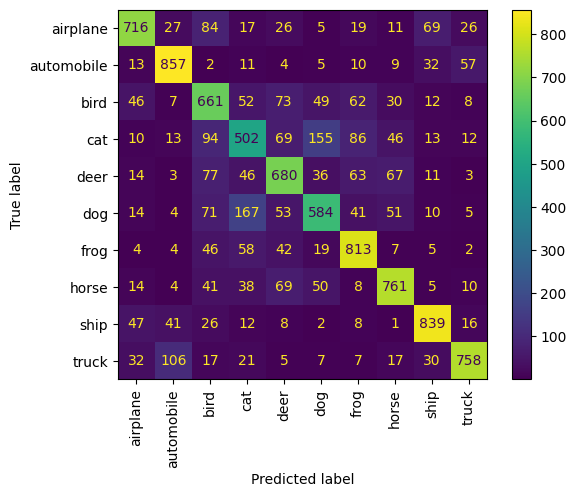

In [12]:
Y_hat_test = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_hat_test.argmax(axis=1, keepdims=True),
    ),
    display_labels=labels,
).plot(xticks_rotation="vertical")